In [1]:
from gal4H0 import *
from scipy.stats import gaussian_kde
np.random.seed(123) # Random seed
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25) # True cosmology

In [2]:
# We generate multiple H0 posterior for 200 events, different LOS and dl errors

LOSf=['MICECAT_LOS/micecat_455.csv',
      'MICECAT_LOS/micecat_905.csv']

sigmas=[0.1,0.2,0.3]
Ngw=200
zcut_rate=1.4
dl_thr=1550
H0_array=np.linspace(40,120,100)

posteriors={'H0_grid':H0_array}

for ilos in LOSf:
    galaxies_list = np.genfromtxt(ilos,skip_header=1)    
    sigmaz=0.013*np.power(1+galaxies_list,3.)
    sigmaz[sigmaz>0.015]=0.015
    z_obs=np.random.randn(len(galaxies_list))*sigmaz+galaxies_list
    zinterpo,zinterpolant=build_interpolant(z_obs,sigmaz,zcut_rate)
    
    for sigma in sigmas:
        print(sigma)
        sigma_dl=sigma
        gw_obs_dl,_,_,std_dl=draw_gw_events(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate)
        posterior_matrix,combined=galaxy_catalog_analysis_photo_redshift(H0_array,zinterpo,gw_obs_dl,sigma_dl,dl_thr)
        
        posteriors[ilos+'_'+str(sigma)+'_'+'signle']=posterior_matrix
        posteriors[ilos+'_'+str(sigma)+'_'+'combined']=combined


100%|████████████████████████████████████| 48028/48028 [05:04<00:00, 157.52it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 435.15it/s]
Running on GW events: 200it [01:13,  2.71it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 577.49it/s]
Running on GW events: 200it [01:18,  2.56it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 588.36it/s]
Running on GW events: 200it [01:11,  2.79it/s]
100%|████████████████████████████████████| 23661/23661 [02:42<00:00, 145.35it/s]


0.1
You detected 200 binaries out of 100000 simulated


100it [00:00, 582.34it/s]
Running on GW events: 200it [01:14,  2.67it/s]


0.2
You detected 200 binaries out of 100000 simulated


100it [00:00, 403.21it/s]
Running on GW events: 200it [01:17,  2.58it/s]


0.3
You detected 200 binaries out of 100000 simulated


100it [00:00, 608.40it/s]
Running on GW events: 200it [01:24,  2.36it/s]


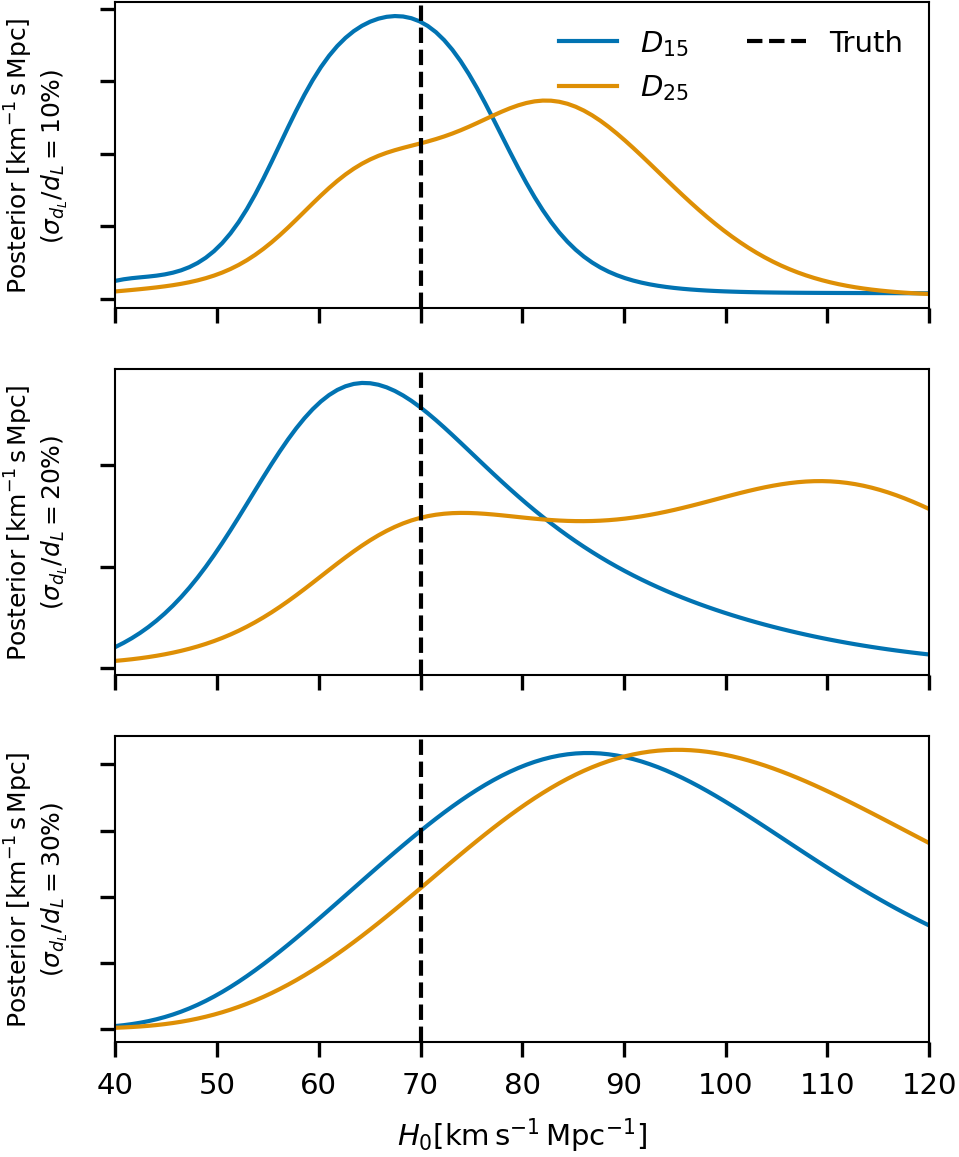

In [3]:
fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)
colors=[pal[0],pal[1]]
lines=['solid','--',':']

labels_1=[
        r'$D_{15}$',
        r'$D_{25}$']

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']

for i in range(len(colors)):
    for j in range(len(lines)):
        ilos=LOSf[i]
        sigma=sigmas[j]
        ax[j].plot(H0_array,posteriors[ilos+'_'+str(sigma)+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])    
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=2)

ax[2].set_xlabel(r'$H_0 {\rm[km \,s^{-1} \,Mpc^{-1}]}$')
#plt.tight_layout()
plt.savefig('figures_paper/big_fig.pdf')

